<a href="https://colab.research.google.com/github/ssafreed/pytorch/blob/main/Pytorch_Simple_NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import torch
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [50]:
# Create a Model Class that inherits nn.Module
class Model(nn.Module):
  # Input layer (4 features of flower)  -->
  # Hidden Layer1 (number of neurons)
  # H2(n) -->
  # Output Layer (3 classes)
  def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
    super().__init__()
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)
    return x

In [51]:
# Pick a manual seed for randomaization
torch.manual_seed(42)
# Create an instance of the model
model = Model()

In [52]:
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
my_df = pd.read_csv(url)

In [53]:
my_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [54]:
# Change last column from string to float
my_df['species'] = my_df['species'].replace('setosa',0.0)
my_df['species'] = my_df['species'].replace('versicolor',1.0)
my_df['species'] = my_df['species'].replace('virginica',2.0)
my_df

<ipython-input-54-9b10fbe1536a>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df['species'] = my_df['species'].replace('virginica',2.0)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [55]:
# Train Test split
x = my_df.drop('species', axis = 1)
y = my_df['species']

In [56]:
# convert to numpy arrays
X = x.values
y = y.values

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
# Train Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 41)

In [59]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [60]:
# set the loss function and optimiser
criterion = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [61]:
# Train our model
epochs = 100
losses = []
for i in range(epochs):
  # GO forward and predict
  y_pred = model.forward(X_train)

  # Measure the Loss
  loss = criterion(y_pred, y_train)
  # Keep track of losses
  losses.append(loss.detach().numpy()) # tensor to numpy

  #print every 10 epoch
  if i % 10 == 0:
    print(f'Epoch {i} and loss {loss}')
  # Do Backpropogation
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch 0 and loss 1.0935204029083252
Epoch 10 and loss 0.9156657457351685
Epoch 20 and loss 0.7562994360923767
Epoch 30 and loss 0.6108629107475281
Epoch 40 and loss 0.44145309925079346
Epoch 50 and loss 0.2723323404788971
Epoch 60 and loss 0.16078141331672668
Epoch 70 and loss 0.09846457839012146
Epoch 80 and loss 0.06856968253850937
Epoch 90 and loss 0.05372077599167824


Text(0.5, 0, 'Epoch')

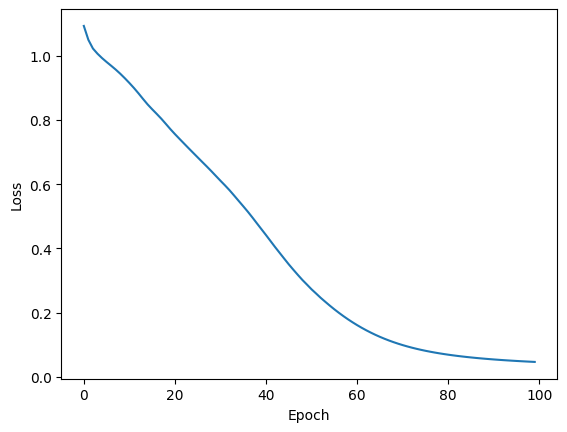

In [62]:
# Graph
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')

In [63]:
# Evalute Model
# turn of backpropogation
with torch.no_grad():
     y_eval = model.forward(X_test)
     loss = criterion(y_eval, y_test)

In [64]:
loss

tensor(0.1311)

In [65]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)

    print(f'{i+1}. {str(y_val)} \t\t {y_test[i]} \t {y_val.argmax().item()}')

    if y_val.argmax().item() == y_test[i]:
      correct += 1

print(f'We got {correct} correct!')

1. tensor([-4.9014,  3.6766,  6.4883]) 		 2 	 2
2. tensor([-7.4458,  2.4418,  9.1490]) 		 2 	 2
3. tensor([-7.6378,  3.5400,  9.5076]) 		 2 	 2
4. tensor([-1.0001,  6.3459,  2.5383]) 		 1 	 1
5. tensor([-6.0028,  3.7181,  7.7264]) 		 2 	 2
6. tensor([0.7767, 6.8187, 0.7138]) 		 1 	 1
7. tensor([-4.0793,  4.4034,  5.6892]) 		 2 	 2
8. tensor([-0.6248,  6.4670,  2.1489]) 		 1 	 1
9. tensor([-4.9591,  4.0803,  6.6220]) 		 2 	 2
10. tensor([-7.7881,  2.6545,  9.5597]) 		 2 	 2
11. tensor([-3.6737,  4.5547,  5.2627]) 		 2 	 2
12. tensor([ 7.9123,  2.5814, -6.5529]) 		 0 	 0
13. tensor([ 7.1133,  2.2449, -5.8508]) 		 0 	 0
14. tensor([1.2906, 5.4687, 0.0467]) 		 1 	 1
15. tensor([ 7.0514,  2.8953, -5.7034]) 		 0 	 0
16. tensor([-3.4022,  5.0489,  5.0158]) 		 2 	 1
17. tensor([ 7.3751,  2.4968, -6.0614]) 		 0 	 0
18. tensor([-4.4830,  4.0366,  6.0780]) 		 1 	 2
19. tensor([ 7.6580,  2.4743, -6.3294]) 		 0 	 0
20. tensor([ 6.4883,  2.3806, -5.2468]) 		 0 	 0
21. tensor([1.0048, 6.1252, 0.4048]

In [69]:
new_iris = torch.tensor([4.7, 3.2, 1.3, 0.2])

In [70]:
with torch.no_grad():
  print(model(new_iris))

tensor([ 7.4680,  2.3943, -6.1625])


In [71]:
newer_iris = torch.tensor([5.9, 3.0, 5.1, 1.8])

In [72]:
with torch.no_grad():
  print(model(newer_iris))

tensor([-4.7114,  3.7813,  6.3040])


In [74]:
# Save and Load NN Model
torch.save(model.state_dict(), 'My_Iris_Dataset_classifier.pt')

In [75]:
# Load the saved Model
new_model = Model()
new_model.load_state_dict(torch.load('My_Iris_Dataset_classifier.pt'))

<ipython-input-75-9560b2235c10>:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  new_model.load_state_dict(torch.load('My_Iris_Dataset_classifier.pt'))


<All keys matched successfully>

In [76]:
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)